# `get*info` RPCs

In the first notebook, we introduced the framework. In this notebook, we'll setup the framework as before, and then run some RPCs on the running nodes.

As before, we start by importing utility functions and setting up some variables.

In [1]:
from utils import *

srcdir = "../bitcoin/src" # Change this to the path for your bitcoind executable

self = ExampleTest()
setup_test(self, srcdir)

2017-11-05 16:59:30.581000 TestFramework (INFO): Initializing test directory /tmp/user/1000/testqy3bqp8q


We'll also import matplotlib and numpy so we can graph some data:

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display

# `getblockchaininfo`

The `TestNode` class maps calls to unknown methods onto RPC method calls. We'll start by calling the `getblockchaininfo` RPC.

In [3]:
pprint(self.nodes[0].getblockchaininfo())

{'bestblockhash': '0f9188f13cb7b2c71f2a335e3a4fc328bf5beb436012afca590b1a11466e2206',
 'bip9_softforks': {'csv': {'since': 0,
                            'startTime': 0,
                            'status': 'defined',
                            'timeout': 999999999999},
                    'segwit': {'since': 0,
                               'startTime': 0,
                               'status': 'defined',
                               'timeout': 999999999999}},
 'blocks': 0,
 'chain': 'regtest',
 'chainwork': '0000000000000000000000000000000000000000000000000000000000000002',
 'difficulty': Decimal('4.656542373906925E-10'),
 'headers': 0,
 'mediantime': 1296688602,
 'pruned': False,
 'size_on_disk': 293,
 'softforks': [{'id': 'bip34', 'reject': {'status': False}, 'version': 2},
               {'id': 'bip66', 'reject': {'status': False}, 'version': 3},
               {'id': 'bip65', 'reject': {'status': False}, 'version': 4}],
 'verificationprogress': 1,
 'warnings': 'This is a p

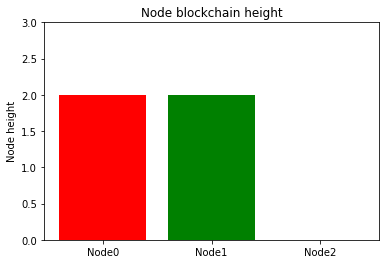

In [6]:
fig, ax = plt.subplots()
ind = np.arange(1, 4)

# show the figure, but do not block
#    plt.show(block=False)

blocks = [self.nodes[i].getblockchaininfo()['blocks'] for i in range(3)]

n0, n1, n2 = plt.bar(ind, blocks)
n0.set_facecolor('r')
n1.set_facecolor('g')
n2.set_facecolor('b')
ax.set_xticks(ind)
ax.set_xticklabels(['Node0', 'Node1', 'Node2'])
ax.set_ylim([0, max(blocks) + 1])
ax.set_ylabel('Node height')
ax.set_title('Node blockchain height')

# ask the canvas to re-draw itself the next time it
# has a chance.
# For most of the GUI backends this adds an event to the queue
# of the GUI frameworks event loop.
fig.canvas.draw()

for i in range(5):  # run for a little while
    blocks = [self.nodes[i].getblockchaininfo()['blocks'] for i in range(3)]
    pprint(blocks)

    # update the animated artists
    n0.set_height(blocks[0])
    n1.set_height(blocks[1])
    n2.set_height(blocks[2])

    # ask the canvas to re-draw itself the next time it
    # has a chance.
    # For most of the GUI backends this adds an event to the queue
    # of the GUI frameworks event loop.'
    display.display(fig)
    display.clear_output(wait=True)
    fig.canvas.draw()
    try:
        # make sure that the GUI framework has a chance to run its event loop
        # and clear any GUI events.  This needs to be in a try/except block
        # because the default implementation of this method is to raise
        # NotImplementedError
        fig.canvas.flush_events()
    except NotImplementedError:
        pass
    time.sleep(1)

In [5]:
self.nodes[0].generate(2)

['6c729790524ce37197a058ff044f7e7231d33574ae16118227735989f5b24063',
 '5cc01407fd488153008706f3c1a658be28972f9233266f8a1d734100311e3c8f']

In [33]:
self.nodes[0].getblockchaininfo()

{'bestblockhash': '13f78f95401e695984fd0ad896a752a267ad0ee8148a0209fada9ca6165dd206',
 'bip9_softforks': {'csv': {'since': 0,
   'startTime': 0,
   'status': 'defined',
   'timeout': 999999999999},
  'segwit': {'since': 0,
   'startTime': 0,
   'status': 'defined',
   'timeout': 999999999999}},
 'blocks': 18,
 'chain': 'regtest',
 'chainwork': '0000000000000000000000000000000000000000000000000000000000000026',
 'difficulty': Decimal('4.656542373906925E-10'),
 'headers': 18,
 'mediantime': 1509862085,
 'pruned': False,
 'size_on_disk': 5245,
 'softforks': [{'id': 'bip34', 'reject': {'status': False}, 'version': 2},
  {'id': 'bip66', 'reject': {'status': False}, 'version': 3},
  {'id': 'bip65', 'reject': {'status': False}, 'version': 4}],
 'verificationprogress': 1,
 'warnings': 'This is a pre-release test build - use at your own risk - do not use for mining or merchant applications'}

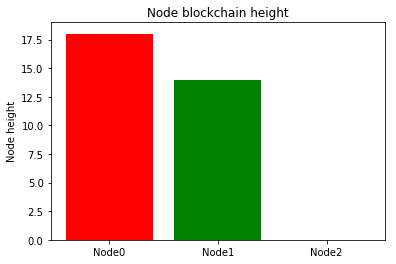

In [31]:
graph_blockchainheight()

# Shutdown

Now that we've finished, call `shutdown_test()` to shutdown the nodes and clean up resources.

In [35]:
shutdown_test(self)

2017-11-05 16:58:49.162000 TestFramework (INFO): Stopping nodes
2017-11-05 16:58:49.423000 TestFramework (INFO): Nodes stopped
2017-11-05 16:58:49.424000 TestFramework (INFO): Cleaning up log directory
